In [2]:
!unzip archive_3.zip


Streaming output truncated to the last 5000 lines.
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_134.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_135.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_136.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_137.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_138.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_139.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_14.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_140.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_141.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_142.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_143.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_144.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_145.png  
  inflating: 500_each_EMNIST-based-Roman/train/v/5_small_146.png  
  inflating:

In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [19]:

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'roman/train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'roman/test',
        target_size=(36, 28),
        batch_size=32,
        class_mode='categorical',
        )


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()


Found 6895 images belonging to 10 classes.
Found 985 images belonging to 10 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                   

In [61]:
if model.layers[-1].input_shape[-1] != 10:
  model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=test_generator,
    validation_steps=20,
    batch_size=32
)

Epoch 1/10
50/50 [==============================] - 4s 52ms/step - loss: 0.6085 - accuracy: 0.8105 - val_loss: 0.6642 - val_accuracy: 0.7609
Epoch 2/10
50/50 [==============================] - 2s 48ms/step - loss: 0.5974 - accuracy: 0.8250 - val_loss: 0.6414 - val_accuracy: 0.7906
Epoch 3/10
50/50 [==============================] - 3s 51ms/step - loss: 0.6228 - accuracy: 0.8143 - val_loss: 0.6529 - val_accuracy: 0.8031
Epoch 4/10
50/50 [==============================] - 2s 42ms/step - loss: 0.5864 - accuracy: 0.8225 - val_loss: 0.6506 - val_accuracy: 0.7953
Epoch 5/10
50/50 [==============================] - 2s 48ms/step - loss: 0.5866 - accuracy: 0.8225 - val_loss: 0.6242 - val_accuracy: 0.8172
Epoch 6/10
50/50 [==============================] - 3s 63ms/step - loss: 0.5854 - accuracy: 0.8263 - val_loss: 0.6451 - val_accuracy: 0.7953
Epoch 7/10
50/50 [==============================] - 2s 48ms/step - loss: 0.5885 - accuracy: 0.8138 - val_loss: 0.6360 - val_accuracy: 0.7937
Epoch 8/10
50

In [68]:

score = model.evaluate(test_generator, steps=20, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

img = tf.keras.preprocessing.image.load_img('roman/val/v/5_cap_353.png', target_size=(28, 28))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
predictions = model.predict(img)

print('Predicted label:', np.argmax(predictions))


Test loss: 0.6502100229263306
Test accuracy: 0.792187511920929
1/1 [==============================] - 0s 86ms/step
Predicted label: 5


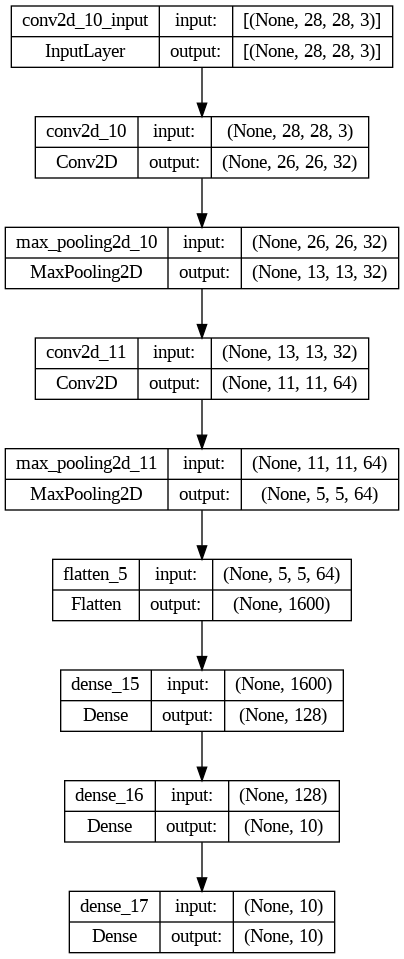

In [69]:


from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


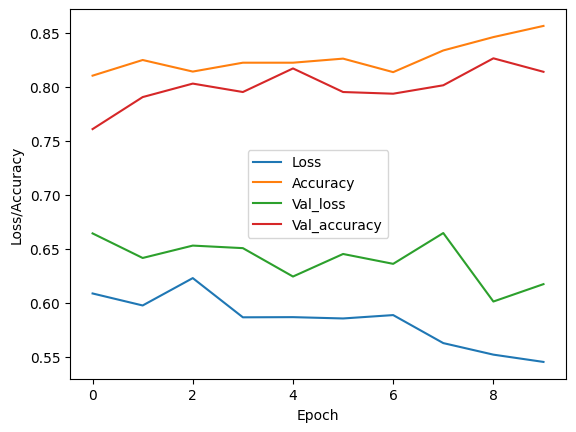

In [67]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()
